In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


link = 'https://drive.google.com/open?id=1m-mMa8FvZbf5xndHAbYtT7aJS93TFRSp'




In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1m-mMa8FvZbf5xndHAbYtT7aJS93TFRSp


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('housing.csv')  
df3 = pd.read_csv('housing.csv')
# Dataset is now stored in a Pandas Dataframe

In [0]:
prices = df3['MEDV']
features = df3.drop('MEDV', axis = 1)



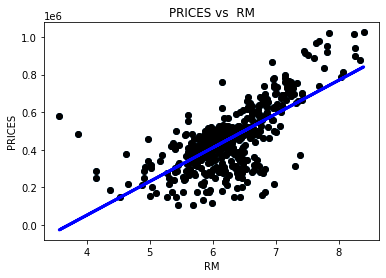

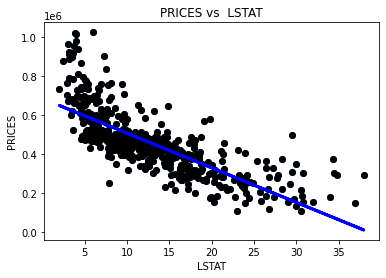

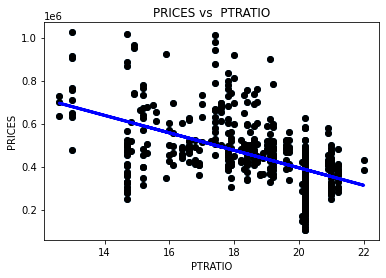

In [0]:
import matplotlib.pyplot as plt
import numpy as np

for col in features.columns:

    fig, ax = plt.subplots()
    fit = np.polyfit(features [col], prices, deg=1) # We use a linear fit to compute the trendline
    ax.scatter(features [col],  prices)
    plt.plot(features [col], prices, 'o', color='black')
    ax.plot(features[col], fit[0] * features[col] + fit[1], color='blue', linewidth=3) # This plots a trendline with the regression parameters computed earlier. We should plot this after the dots or it will be covered by the dots themselves
    plt.title('PRICES vs  '+ str(col)) # title here
    plt.xlabel(col) # label here
    plt.ylabel('PRICES') # label here

In [0]:
#  Minimum price of the data
minimum_price = np.min(prices)

#  Maximum price of the data
maximum_price = np.max(prices)

#  Mean price of the data
mean_price = np.mean(prices)

#  Median price of the data
median_price = np.median(prices)

#  Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


In [0]:
from scipy.stats import chi2_contingency
obs = pd.read_csv('housing.csv')
chi2_contingency(obs)



(9066.673913559007,
 0.0,
 1464,
 array([[6.92211028e+00, 1.43534327e+01, 2.05397081e+01, 5.03985040e+05],
        [6.23002548e+00, 1.29183512e+01, 1.84861118e+01, 4.53595727e+05],
        [1.00080830e+01, 2.07523921e+01, 2.96965947e+01, 7.28668558e+05],
        ...,
        [6.89336254e+00, 1.42938225e+01, 2.04544060e+01, 5.01891974e+05],
        [6.34540038e+00, 1.31575883e+01, 1.88284593e+01, 4.61995943e+05],
        [3.43250958e+00, 7.11752535e+00, 1.01851519e+01, 2.49914175e+05]]))

In [0]:
g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")
expctd
dof
g
p

0.0

In [0]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)

    # Return the score
    return score

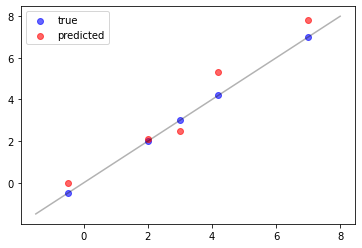

In [0]:
%matplotlib inline

true, pred = [3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3]
#Plot true values
true_handle = plt.scatter(true, true, alpha=0.6, color='blue', label='true')

#Reference line
fit = np.poly1d(np.polyfit(true, true, 1))
lims = np.linspace(min(true) - 1, max(true) + 1)
plt.plot(lims, fit(lims), alpha=0.3, color='black')

#Plot predicted values
pred_handle = plt.scatter(true, pred, alpha=0.6, color='red', label='predicted')

#Legend and show
plt.legend(handles=[true_handle, pred_handle], loc='upper left')
plt.show()

In [0]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


In [0]:

from sklearn.model_selection import train_test_split

X = prices
y = features

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [0]:

from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(y, X)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [0]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

#Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [0]:
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67
